# Your First Model - Fashion MNIST

## Fashion MNIST Dataset

Each picture is 28x28 pixels or 784 bytes

| Label | Class |
|-------|-------|
| 0 | T-Shirt/Top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandals |
| 6 | Shirt |
| 7 | Sneakers |
| 8 | Bag |
| 9 | Ankle Boot |

The dataset has 70,000 images, 60,000 will be used for training and the remaining 10,000 will be used for testing.

## Neural Network

The input ot the network will be the 784 bytes, or pixels

*Flattening* - Taking a 2D image and converting it to a 1D vector

The dense layer is 128 units, and will be fully connected to the previous. It also has a ReLU activation because this is more complex than just simple conversion.

The output will have 10 units, and the value for each will corelate the confidence of each item. The higher the confidence value of a specific unit means that the network thinks that it is that item.

The sum of all of the outputs will be 1. To do this, the output layer activation will be softmax.

Whenever the network does classification it will have the same number of output units as it does classes, and always use the softmax function

### Rectified Linear Unit (ReLU)

[Graph]

If the output is less than or equal to zero, the output will be zero. Otherwise the output will be equal to the input.

This gives the network the ability to solve nonlinear problems.

### Review

*Flattening* - The process of taking a 2d image to a 1d vector  
*ReLU* - An activation function that allows a network to solve nonlinear problems  
*Softmax* - A function that provides probability for each possible output class  
*Classification* - A machine learning model used for distinguishing among two or more output categories

## Your First Model - Fashion MNIST

You always need to split your data into at least two different partitions. One for training, and one for testing.

We split the data because after the network uses the training data set, we want to test it with data that it hasn't seen before so we know how well it performs. If the practice was the same as the test, we wouldn't be able to tell if the network was just memorizing the answers or if it was actually learning to identify things correctly.

*Training Set* - The data used for training the neural network  
*Test Set* - The data used for testing the final performance of our network 

## Colab: Fashion MNIST

To be able to train and test the network, we are going to need a dataset, and tensorflow provides that for us. We also need to import all of the required dependencies

In [17]:
import tensorflow as tf

# Import the Datasets from tensorflow
import tensorflow_datasets as tfds

# Import the helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Import logging utilities
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Now, after importing everything, we need to load the dataset. Loading the dataset returns the metadata as well as the training dataset and the test dataset

In [18]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

The dataset contains 70,000 images, they are 28x28 pixels in gray scale with a value between 0 and 255. Each photo has an associated label, 0-9, that represents what type of clothing it is.

In [19]:
class_names = metadata.features['label'].names
print("Class names = {}".format(class_names))

Class names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Before we preprocessed the data, lets look at it first. We can see that it returned the name of each label and also the total number of examples in each set

In [20]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples:     {}".format(num_train_examples))
print("Number of test examples:         {}".format(num_test_examples))

Number of training examples:     60000
Number of test examples:         10000


Before we can do anything with the data, it needs to be preprocessed, or normalized

Because each pixel has a value of 0-255, it needs to be normalized between 0-1, so the network can work properly. If this is left untouched it won't work properly.

In [21]:
# Convert the image grey scale from 0-255 to 0-1 for the network so it can read it easier
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and the test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you will use the dataset, the images will be loaded from the disk
# Caching will keep them in memory, making everything faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

After the data gets normalized, lets look at a couple examples to see what the network will train on.

2022-09-13 12:46:47.790109: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-13 12:46:47.790537: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


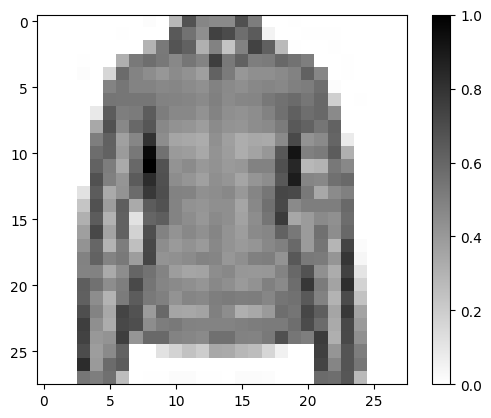

In [22]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

2022-09-13 12:46:48.776313: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-13 12:46:48.776481: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


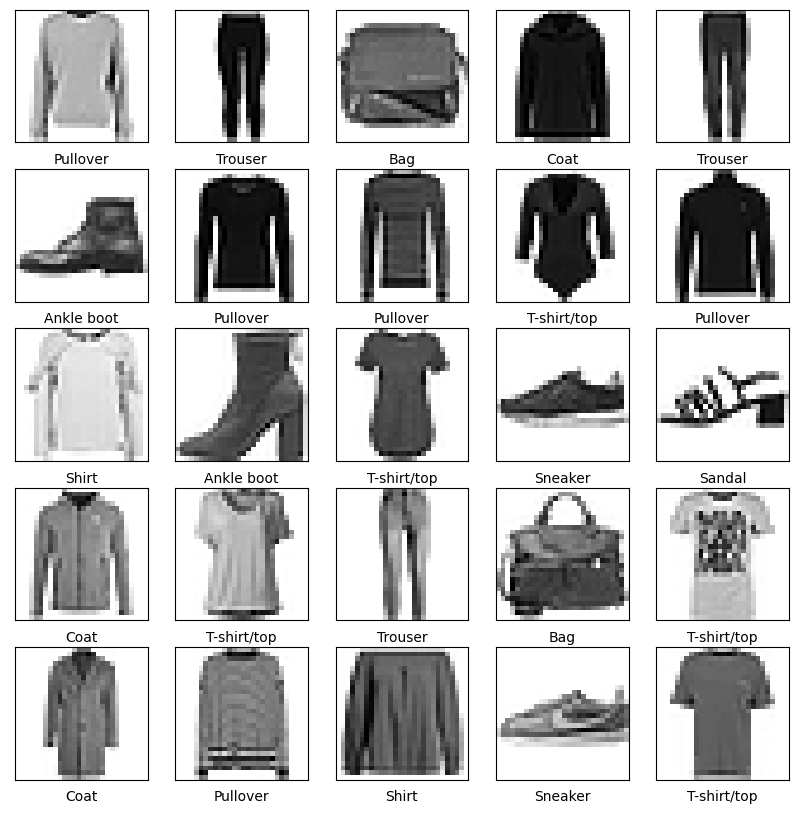

In [23]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

Now that all of the setup and preprocessing has been completed, we can start to configure the network

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

We will need to setup the layers for the network. For this simple example we will use three dense layers:

***`input`** (flatten)* - This layer transforms a 2d-array of 28x28 pixels, to a 1d-array of 784 pixels. This unstacks the rows  
***`"Hidden"`** (dense)* - A densely connected layer with 128 neurons. Each node (neuron) is taking input from the 784 input nodes in the previous layer. It weighs its input according to the hidden parameters obtained from training, then outputs a single value.  
***`Output`** (dense)* - A 10 node layer that represented the probability of the nodes. The sum of all values will equal 1

Now the layers are setup, it is time to compile the model. This is where the final settings will get applied, like the optimizer, loss, and metrics

***`Loss`** function* - An algorithm used to measure the inaccuracy   
***`Optimizer`** function* - An algorithm used for adjusting the parameters of the nodes in the hidden layer
*Metric* - Used for training and sets what we are measuring

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Now the model is set we need to define the iteration behavior for hte training data set:
1) Repeat forever (the epoch will limit this)
2) Shuffle the dataset so the model doesn't learn by the order
3) Use batches of 32

After that we can start training by calling the previous parameters in the fit function, the model begins to learn and also set the epoch size.

In [26]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

During the training, it will display the progress

In [27]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4906 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3734 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3084 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2977 - accuracy: 0.8901


After the model gets trained its accuracy gets evaluated against the test dataset

In [28]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3521 - accuracy: 0.8677
Accuracy on test dataset: 0.8676999807357788


After the model has been trained and its accuracy has been assessed, it can be used to make predictions.

In [29]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape

1/1 [==============================] - 0s 115ms/step


(32, 10)

In [30]:
predictions[0]

array([8.6764785e-06, 5.5386290e-06, 9.0337554e-03, 1.0447397e-06,
       9.2754108e-01, 1.2618265e-09, 6.3296102e-02, 3.7980458e-10,
       1.1379772e-04, 2.5732890e-11], dtype=float32)

This ad the model make predictions about the rest of the dataset. This outputs the confidence for all of the different articles of clothing, but we can find the one with the highest value and only return that.

In [31]:
np.argmax(predictions[0])

4

We can also graph the confidence

In [32]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

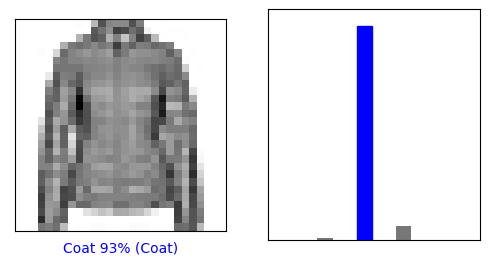

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

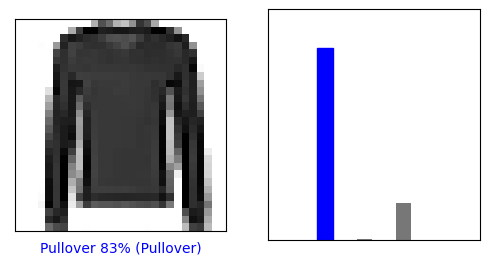

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

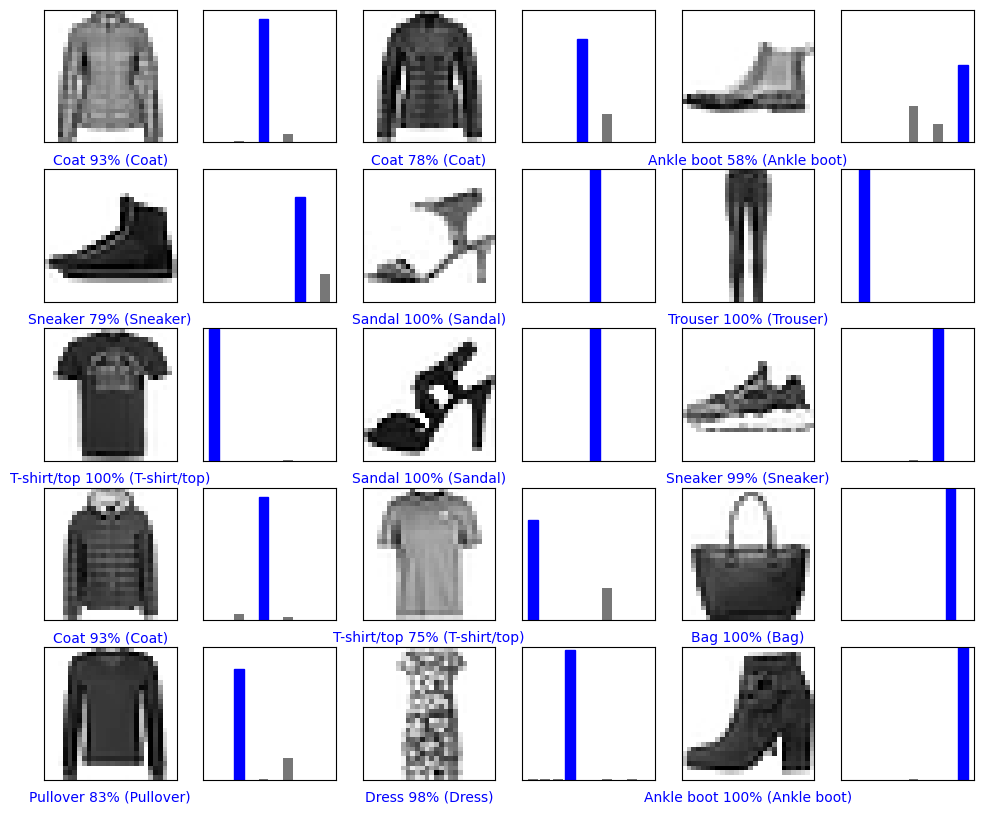

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
